In [34]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp

In [35]:
sys.path.append('../External_Functions')                  # Add the folder with the functions to the path
from MyFunctions import *
matplotlib_plotparameters()                             # Set the plot parameters to something nice
from ExternalFunctions import Chi2Regression

# 4.1

In [120]:
data = np.genfromtxt('data_FisherSyndrome.txt') # Load the data
print(np.shape(data))
mask = data[:,0] == 1                                   # Create a mask to select the data for the ill people
ill = data[mask]                                        # Select the data for the ill people
healthy = data[~mask]                                   # Select the data for the healthy people

A = data[:,2]
print(len(A))

A_i = ill[:,2]                                          # The data matrix
A_h = healthy[:,2]                                        # The data matrix
print(len(A_i))

B = data[:,3]

B_i = ill[:,3]                                            # The data matrix
B_h = healthy[:,3]                                        # The data matrix

C = data[:,4]

C_i = ill[:,4]                                            # The data matrix
C_h = healthy[:,4]                                        # The data matrix

(5000, 5)
5000
2000


In [37]:
Amin, Amax = np.min(A), np.max(A)                    # The minimum and maximum of the data
Bmin, Bmax = np.min(B), np.max(B)                    # The minimum and maximum of the data
Cmin, Cmax = np.min(C), np.max(C)                    # The minimum and maximum of the data



In [38]:
def bins_create(data, Nbins):
    '''
    This function returns the bin widths and the range for a histogram.
    '''
    dmin, dmax = np.min(data), np.max(data)
    bin_width = (dmax - dmin)/Nbins
    return bin_width, (dmin, dmax)

In [67]:
# Define function to create histograms and remove bins without data
def hist_create(data, Nbins, bin_width = None, datamin = None, datamax = None,plot=False, type='step',labe='Data',colour='black'):

    if bin_width == None and datamin == None and datamax == None:    
        datamin, datamax = np.min(data), np.max(data)     # The minimum and maximum of the data
        bin_width = (datamax - datamin) / Nbins           # The width of the bins

    count_int,bins_int,_ = plt.hist(data, bins=Nbins, range=(datamin,datamax), histtype=type, label=labe, color=colour)
    mask_int = count_int > 0


    count_int = count_int[mask_int]
    error_count_int = np.sqrt(count_int)
    center_bins_int = (bins_int[:-1] + bins_int[1:]) / 2
    center_bins_int = center_bins_int[mask_int]
    if plot == True:
        plt.errorbar(center_bins_int, count_int, yerr=error_count_int, fmt='o', label='Data')
    
    return count_int, error_count_int, center_bins_int, bin_width

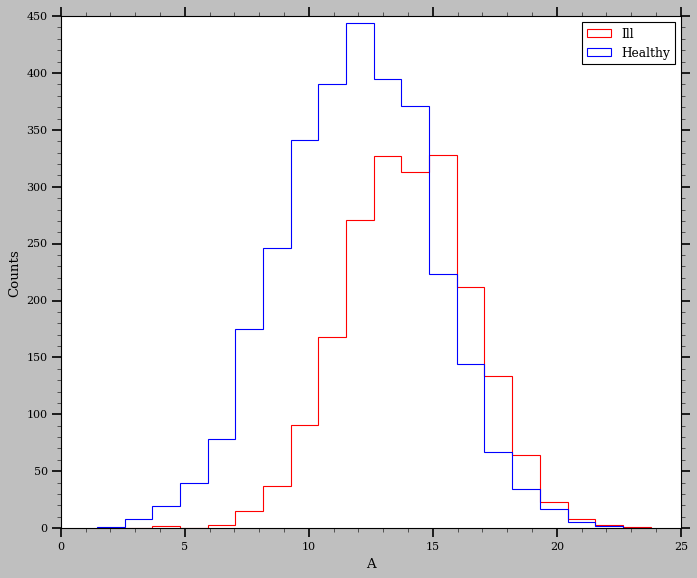

In [68]:
Nbins = 20

A_bin_width, A_range = bins_create(A, Nbins)


A_i_count, A_i_error, A_i_center, A_bin_width = hist_create(A_i, Nbins, A_bin_width, A_range[0], A_range[1], plot=False, type='step', labe='Ill', colour='red')
A_h_count, A_h_error, A_h_center, A_bin_width = hist_create(A_h, Nbins, A_bin_width, A_range[0], A_range[1], plot=False, type='step', labe='Healthy', colour='blue')
plt.xlabel('A')
plt.ylabel('Counts')
plt.legend()
plt.show()

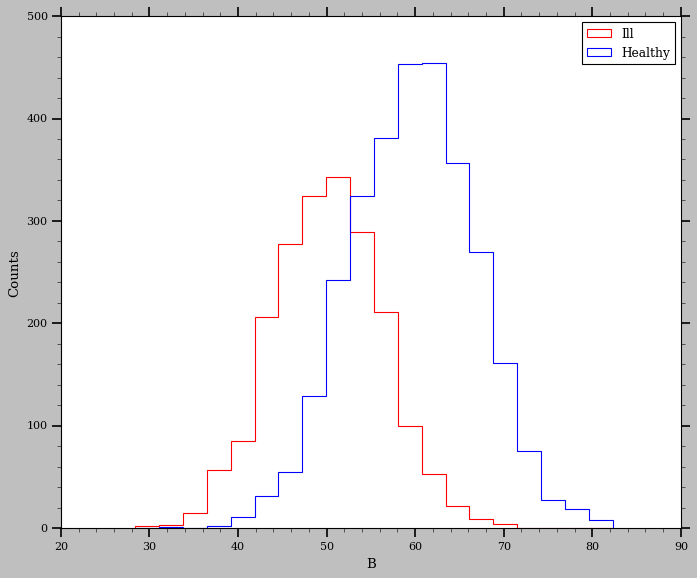

In [70]:
B_bin_width, B_range = bins_create(B, Nbins)

B_i_count, B_i_error, B_i_center, B_bin_width = hist_create(B_i, Nbins, B_bin_width, B_range[0], B_range[1], plot=False, type='step', labe='Ill', colour='red')
B_h_count, B_h_error, B_h_center, B_bin_width = hist_create(B_h, Nbins, B_bin_width, B_range[0], B_range[1], plot=False, type='step', labe='Healthy', colour='blue')

plt.xlabel('B')
plt.ylabel('Counts')
plt.legend()
plt.show()



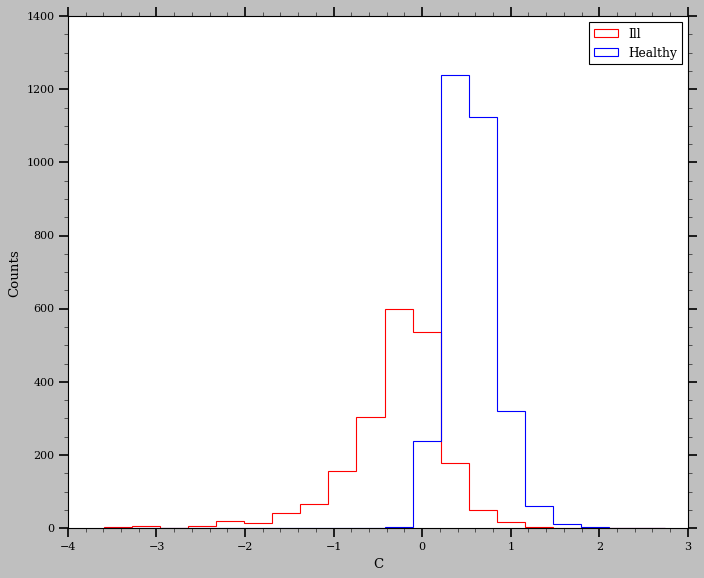

In [69]:

C_bin_width, C_range = bins_create(C, Nbins)

C_i_count, C_i_error, C_i_center, C_bin_width = hist_create(C_i, Nbins, C_bin_width, C_range[0], C_range[1], plot=False, type='step', labe='Ill', colour='red')
C_h_count, C_h_error, C_h_center, C_bin_width = hist_create(C_h, Nbins, C_bin_width, C_range[0], C_range[1], plot=False, type='step', labe='Healthy', colour='blue')

plt.xlabel('C')
plt.ylabel('Counts')
plt.legend()
plt.show()


In [121]:
# find linear correlation coefficient between B and C
rho_BC = np.corrcoef(B_i,C_i)
print(rho_BC)

[[ 1.         -0.38827115]
 [-0.38827115  1.        ]]


In [110]:
def gauss(x, mean, sigma,N):
    return N*stats.norm.pdf(x, mean, sigma)

gaus_chi2 = Chi2Regression(gauss, A_i_center, A_i_count, A_i_error)
gaus_fit = Minuit(gaus_chi2, mean=15, sigma=3, N=len(A_i)*A_bin_width)
gaus_fit.errordef=1
gaus_fit.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.756                      │              Nfcn = 73               │
│ EDM = 6.74e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mean  │   14.04   │   0.06    │            │            │         │         │       │
│ 1 │ sigma │   2.55    │   0.04    │            │            │         │         │       │
│ 2 │ N     │  2.22e3   │  0.05e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │     mean    sigma        N │
├───────┼────────────────────────────┤
│  mean │   0.0033 1.78e-05  -0.0048 │
│ sigma │ 1.78e-05  0.00163     0.01 │
│     N │  -0.0048     0.01 2.48e+03 │
└───────┴────────────────────────────┘

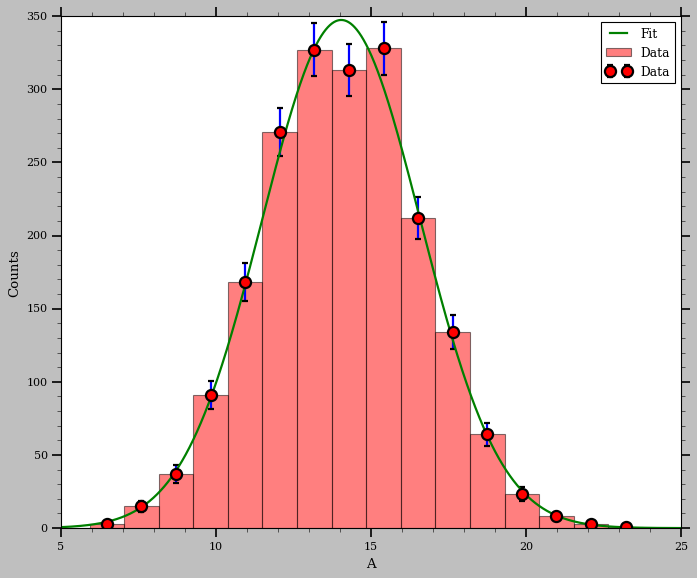

In [44]:
array = np.linspace(5, 25, 10000)
# Plot the data and the fit
plt.errorbar(A_i_center, A_i_count, yerr=A_i_error, fmt='o', label='Data')
plt.hist(A_i, bins=Nbins, range=(A_range[0],A_range[1]), label='Data', color='red',alpha=0.5)
plt.plot(array, gauss(array, *gaus_fit.values), label='Fit')
plt.xlabel('A')
plt.ylabel('Counts')
plt.xlim(5, 25)
plt.legend()


In [72]:
chi2_prob(gaus_fit, len(A_i_center)-3)

(0.7798011285719704, 14)

In [73]:
fish_test_ill_data = ill[:,2:]

fish_test_healthy_data = healthy[:,2:]

(2000, 3)
[[ 1.50163e+01  4.85929e+01 -4.36900e-01]
 [ 1.55746e+01  5.61444e+01 -1.34240e+00]
 [ 7.21740e+00  3.66392e+01 -1.41300e-01]
 ...
 [ 1.64833e+01  5.83600e+01 -5.53100e-01]
 [ 1.45859e+01  5.56463e+01 -8.98000e-02]
 [ 1.32436e+01  4.73355e+01  3.97000e-02]]


In [74]:
ill_fish,healthy_fish, wf = fisher_disc(fish_test_ill_data, fish_test_healthy_data)

In [80]:
tot_bin_width, bin_range =bins_create(np.append(ill_fish,healthy_fish), 70)

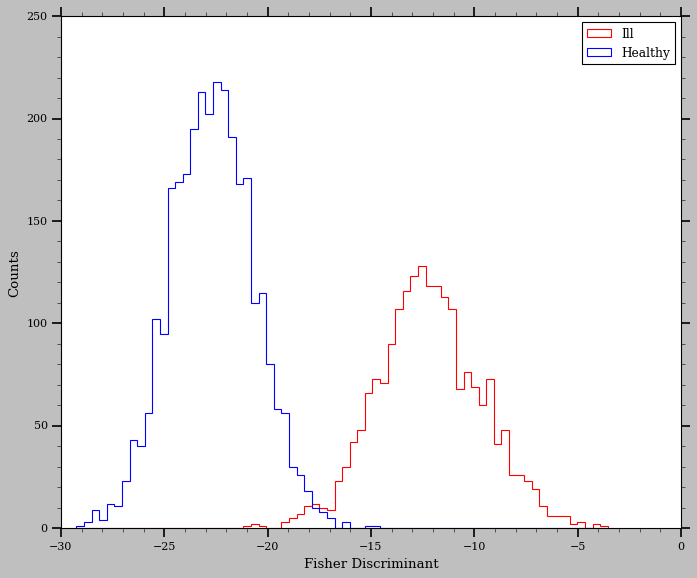

In [82]:


hist_create(ill_fish, 70,bin_width=tot_bin_width, datamin=bin_range[0], datamax=bin_range[1],type='step', labe='Ill', colour='red')
hist_create(healthy_fish, 70,bin_width=tot_bin_width, datamin=bin_range[0], datamax=bin_range[1], type='step', labe='Healthy', colour='blue')
plt.xlabel('Fisher Discriminant')
plt.ylabel('Counts')
plt.legend()
plt.show()

Text(0, 0.5, 'True Positive Rate')

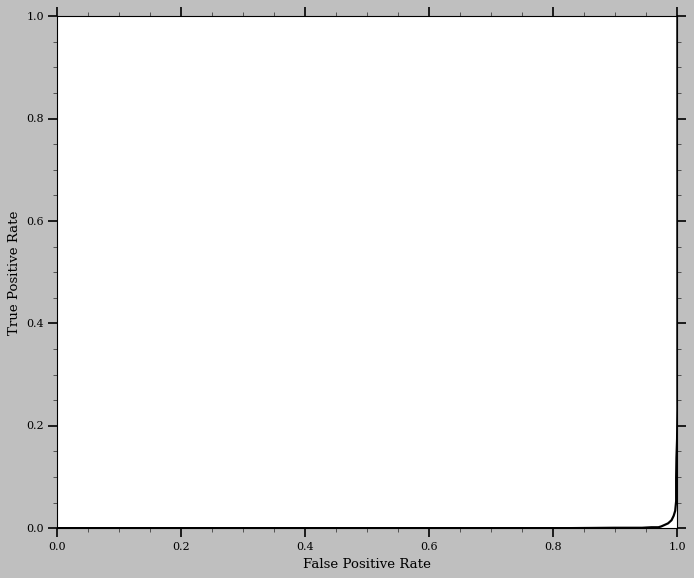

In [89]:
FPR, TPR = roc_curve( healthy_fish,ill_fish,bin_range, 70)
plt.plot(FPR, TPR, color='Black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [109]:
conf_95 = np.where(FPR > 0.95)
# print([conf_95][0][0])
print(TPR[conf_95][-1])

0.0016666666666666668


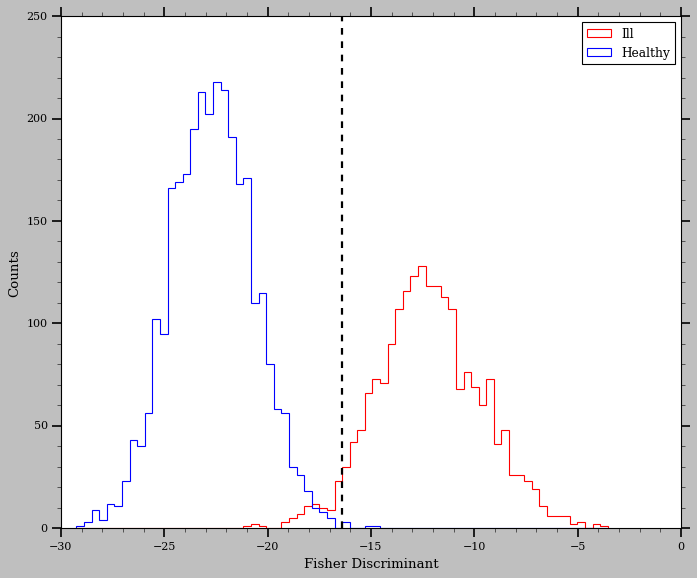

In [112]:
counts, counts_er, b,c = hist_create(ill_fish, 70,bin_width=tot_bin_width, datamin=bin_range[0], datamax=bin_range[1],type='step', labe='Ill', colour='red')
counts_h,countser_h,b_h,c_h = hist_create(healthy_fish, 70,bin_width=tot_bin_width, datamin=bin_range[0], datamax=bin_range[1], type='step', labe='Healthy', colour='blue')
plt.axvline(bin_range[0]+35*tot_bin_width, color='black', linestyle='--')
plt.xlabel('Fisher Discriminant')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [114]:
alpha = counts[10]/len(ill_fish)
beta = counts[-2]/len(healthy_fish)
print(alpha)
print(beta)


0.0115
0.0006666666666666666
